In [480]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [481]:
train_df = pd.read_csv('data//Train.csv')
test_df = pd.read_csv('data//Test.csv')

train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [482]:
print(train_df.shape)
train_df.info()

(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [483]:
print(test_df.shape)
test_df.info()

(5681, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [484]:
train_df.isnull().sum()  

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [485]:
test_df.isnull().sum()  

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

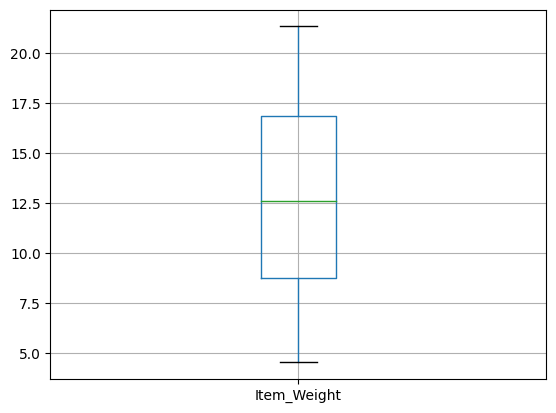

In [486]:
train_df.boxplot(column=['Item_Weight'])
plt.show()

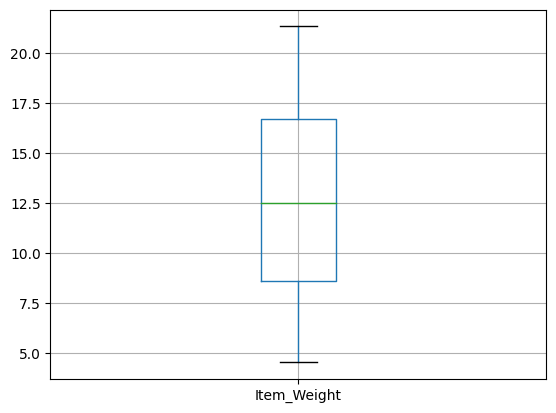

In [487]:
test_df.boxplot(column=['Item_Weight'])
plt.show()

In [488]:
# handeling the features null values
train_df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [489]:
test_df['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [490]:
#replacing null values with mean values
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(),inplace=True)  
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(),inplace=True)

In [491]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [492]:
#replacing null values with mean values
train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0],inplace=True)  
test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0],inplace=True)

In [493]:
train_df.isnull().sum()  

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [494]:
test_df.isnull().sum()  

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [495]:
# detecting duplicated rows
train_df.duplicated().any()

False

In [496]:
test_df.duplicated().any()

False

In [497]:
# Applying dimentionality reduction
train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [498]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


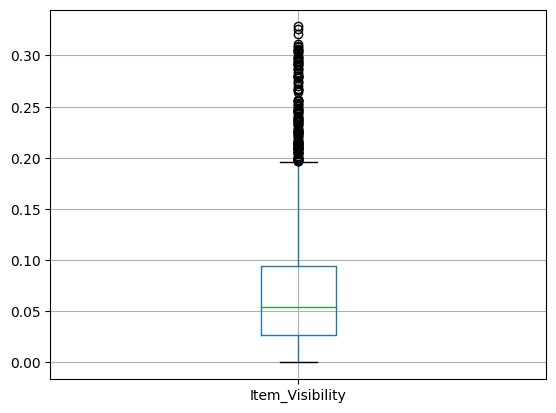

In [499]:
# Detecting & handeling outliers
train_df.boxplot(column=['Item_Visibility'])
plt.show()

In [500]:
def outliers(df,str):
    arr = df[str].to_numpy()

    # finding the 1st quartile
    q1 = np.quantile(arr, 0.25)
    
    # finding the 3rd quartile
    q3 = np.quantile(arr, 0.75)
    
    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers = arr[(arr <= lower_bound) | (arr >= upper_bound)]
    print('The number of the outliers for ' + str+' in the boxplot: {}'.format(outliers.size))
    
    return  lower_bound, upper_bound, outliers


In [501]:
lower_bound, upper_bound,item_visibility_outliers  = outliers(train_df,'Item_Visibility')

The number of the outliers for Item_Visibility in the boxplot: 144


In [502]:
def removeOutliers(df,str, upper_bound,lower_bound):
    df[str] = np.where(df[str]>upper_bound,upper_bound,df[str]) 
    df[str] = np.where(df[str]<lower_bound,lower_bound,df[str]) 
    return


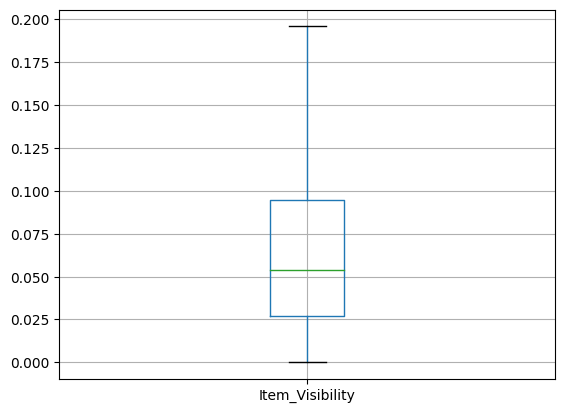

In [503]:
removeOutliers(train_df,'Item_Visibility',upper_bound,lower_bound)
train_df.boxplot(column=['Item_Visibility'])
plt.show()


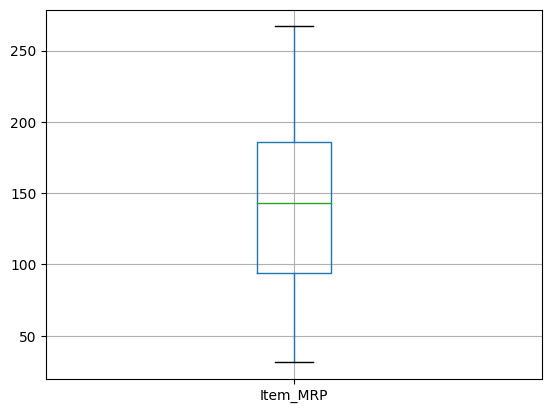

In [504]:
train_df.boxplot(column=['Item_MRP'])
plt.show()

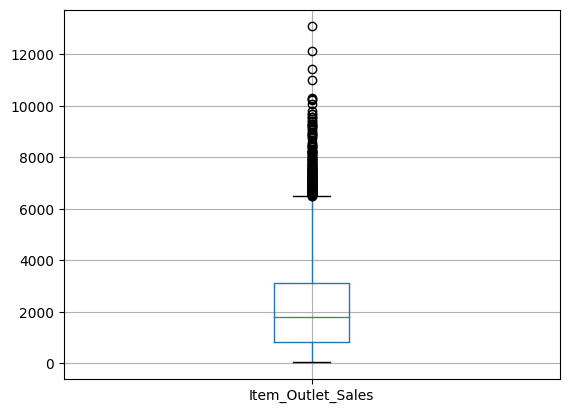

In [505]:
train_df.boxplot(column=['Item_Outlet_Sales'])
plt.show()

In [506]:
lower_bound, upper_bound,Item_Outlet_Sales_outliers = outliers(train_df,'Item_Outlet_Sales')

The number of the outliers for Item_Outlet_Sales in the boxplot: 186


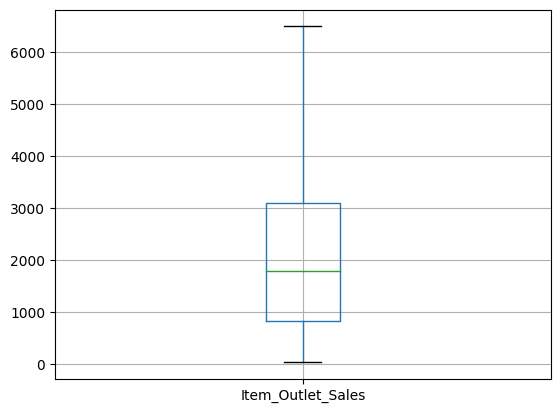

In [507]:
removeOutliers(train_df,'Item_Outlet_Sales',upper_bound,lower_bound)
train_df.boxplot(column=['Item_Outlet_Sales'])
plt.show()

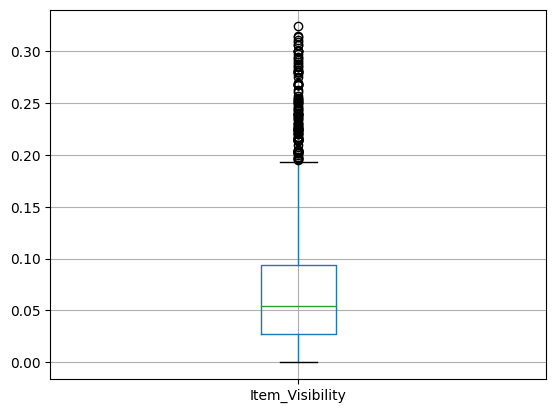

In [508]:
test_df.boxplot(column=['Item_Visibility'])
plt.show()

In [509]:
lower_bound, upper_bound,item_visibility_outliers  = outliers(test_df,'Item_Visibility')

The number of the outliers for Item_Visibility in the boxplot: 113


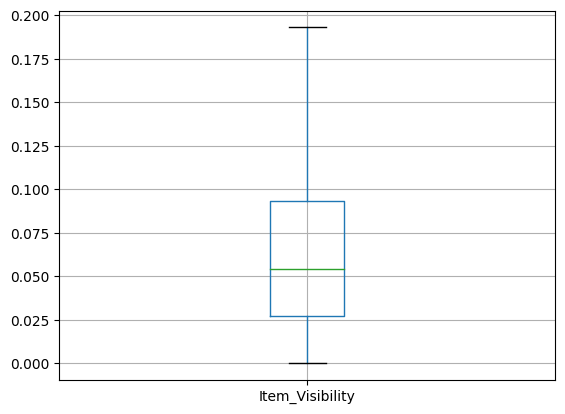

In [510]:
removeOutliers(test_df,'Item_Visibility',upper_bound,lower_bound)
test_df.boxplot(column=['Item_Visibility'])
plt.show()

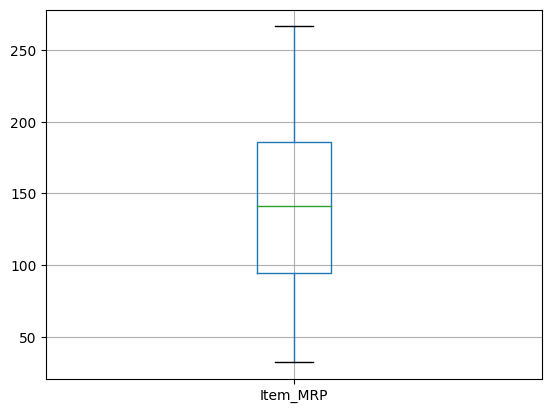

In [511]:
test_df.boxplot(column=['Item_MRP'])
plt.show()

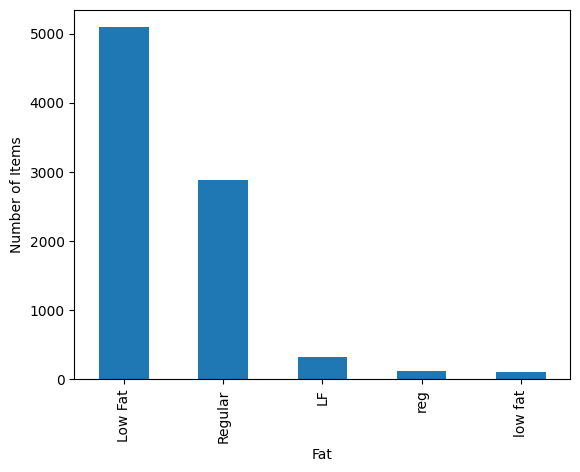

In [512]:
train_df['Item_Fat_Content'].value_counts(normalize = True)
train_df['Item_Fat_Content'].value_counts().plot.bar()
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [513]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

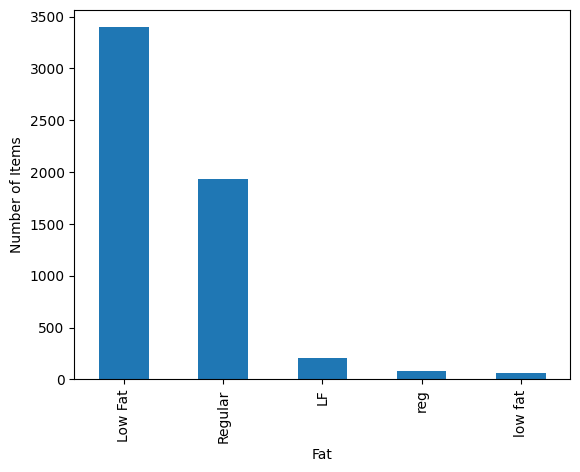

In [514]:
test_df['Item_Fat_Content'].value_counts(normalize = True)
test_df['Item_Fat_Content'].value_counts().plot.bar()
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [515]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
test_df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [516]:
Item_Fat_Content=pd.get_dummies(train_df.Item_Fat_Content,prefix='Item_Fat_Content').astype(int)
Test_Item_Fat_Content=pd.get_dummies(test_df.Item_Fat_Content,prefix='Item_Fat_Content').astype(int)
train_df = pd.concat([train_df,Item_Fat_Content],axis=1)
test_df = pd.concat([test_df,Test_Item_Fat_Content],axis=1)
train_df.drop('Item_Fat_Content', axis=1, inplace=True)
test_df.drop('Item_Fat_Content', axis=1, inplace=True)
train_df.head()


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.30,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0
1,5.92,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1
2,17.50,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0
3,19.20,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,0,1
4,8.93,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,1,0


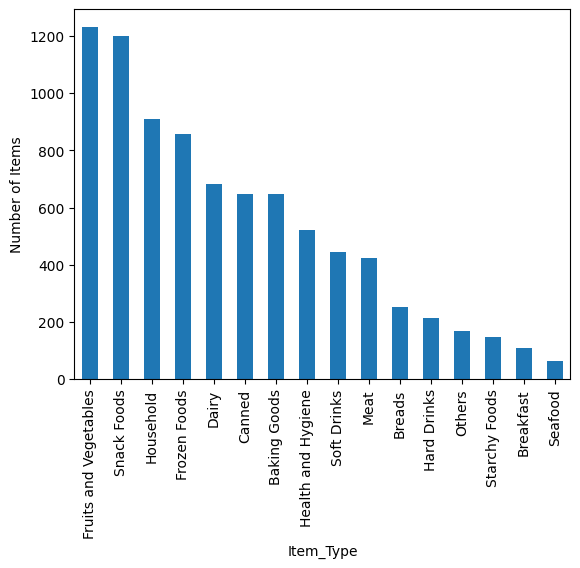

In [517]:
train_df['Item_Type'].value_counts(normalize = True)
train_df['Item_Type'].value_counts().plot.bar()
plt.xlabel('Item_Type')
plt.ylabel('Number of Items')
plt.show()

In [518]:
encoder = LabelEncoder()
train_df['Item_Type'] = encoder.fit_transform(train_df['Item_Type'])
test_df['Item_Type'] = encoder.fit_transform(test_df['Item_Type'])
train_df

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.300,0.016047,4,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0
1,5.920,0.019278,14,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1
2,17.500,0.016760,10,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0
3,19.200,0.000000,6,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,0,1
4,8.930,0.000000,9,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,1,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,1,0
8519,8.380,0.046982,0,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850,0,1
8520,10.600,0.035186,8,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,1,0
8521,7.210,0.145221,13,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,1


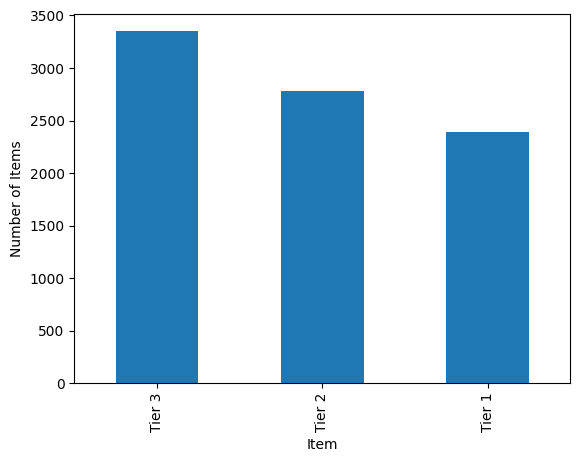

In [519]:
train_df['Outlet_Location_Type'].value_counts(normalize = True)
train_df['Outlet_Location_Type'].value_counts().plot.bar()
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [520]:
Outlet_Location_Type = pd.get_dummies(train_df.Outlet_Location_Type,prefix='Outlet_Location_Type').astype(int)
train_df = pd.concat([train_df,Outlet_Location_Type],axis=1)
train_df.drop('Outlet_Location_Type', axis=1, inplace=True)


Test_Outlet_Location_Type=pd.get_dummies(test_df.Outlet_Location_Type,prefix='Outlet_Location_Type').astype(int)
test_df = pd.concat([test_df,Test_Outlet_Location_Type],axis=1)
test_df.drop('Outlet_Location_Type', axis=1, inplace=True)

test_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,20.750000,0.007565,13,107.8622,1999,Medium,Supermarket Type1,1,0,1,0,0
1,8.300000,0.038428,4,87.3198,2007,Medium,Supermarket Type1,0,1,0,1,0
2,14.600000,0.099575,11,241.7538,1998,Medium,Grocery Store,1,0,0,0,1
3,7.315000,0.015388,13,155.0340,2007,Medium,Supermarket Type1,1,0,0,1,0
4,12.695633,0.118599,4,234.2300,1985,Medium,Supermarket Type3,0,1,0,0,1


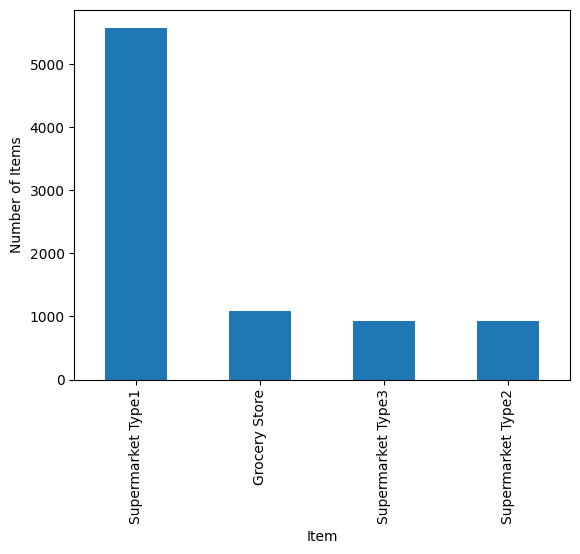

In [521]:
train_df['Outlet_Type'].value_counts(normalize = True)
train_df['Outlet_Type'].value_counts().plot.bar()
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [522]:
Outlet_Type = pd.get_dummies(train_df.Outlet_Type,prefix='Outlet_Type').astype(int)
train_df = pd.concat([train_df,Outlet_Type],axis=1)
train_df.drop('Outlet_Type', axis=1, inplace=True)


Test_Outlet_Type=pd.get_dummies(test_df.Outlet_Type,prefix='Outlet_Type').astype(int)
test_df = pd.concat([test_df,Test_Outlet_Type],axis=1)
test_df.drop('Outlet_Type', axis=1, inplace=True)

test_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,13,107.8622,1999,Medium,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,4,87.3198,2007,Medium,0,1,0,1,0,0,1,0,0
2,14.600000,0.099575,11,241.7538,1998,Medium,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,13,155.0340,2007,Medium,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,4,234.2300,1985,Medium,0,1,0,0,1,0,0,0,1


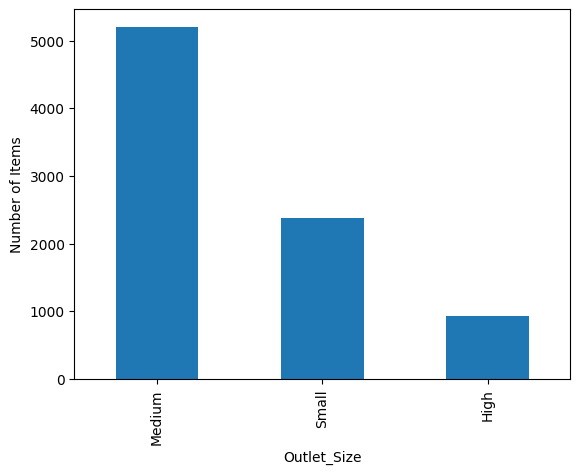

In [523]:
train_df['Outlet_Size'].value_counts(normalize = True)
train_df['Outlet_Size'].value_counts().plot.bar()
plt.xlabel('Outlet_Size')
plt.ylabel('Number of Items')
plt.show()

In [524]:
train_df['Outlet_Size'] = encoder.fit_transform(train_df['Outlet_Size'])
test_df['Outlet_Size'] = encoder.fit_transform(test_df['Outlet_Size'])
train_df

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,4,249.8092,1999,1,3735.1380,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,14,48.2692,2009,1,443.4228,0,1,0,0,1,0,0,1,0
2,17.500,0.016760,10,141.6180,1999,1,2097.2700,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,6,182.0950,1998,1,732.3800,0,1,0,0,1,1,0,0,0
4,8.930,0.000000,9,53.8614,1987,0,994.7052,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,1987,0,2778.3834,1,0,0,0,1,0,1,0,0
8519,8.380,0.046982,0,108.1570,2002,1,549.2850,0,1,0,1,0,0,1,0,0
8520,10.600,0.035186,8,85.1224,2004,2,1193.1136,1,0,0,1,0,0,1,0,0
8521,7.210,0.145221,13,103.1332,2009,1,1845.5976,0,1,0,0,1,0,0,1,0


In [525]:
train_df.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_Type                          int32
Item_MRP                         float64
Outlet_Establishment_Year          int64
Outlet_Size                        int32
Item_Outlet_Sales                float64
Item_Fat_Content_Low Fat           int32
Item_Fat_Content_Regular           int32
Outlet_Location_Type_Tier 1        int32
Outlet_Location_Type_Tier 2        int32
Outlet_Location_Type_Tier 3        int32
Outlet_Type_Grocery Store          int32
Outlet_Type_Supermarket Type1      int32
Outlet_Type_Supermarket Type2      int32
Outlet_Type_Supermarket Type3      int32
dtype: object

In [526]:
test_df.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_Type                          int32
Item_MRP                         float64
Outlet_Establishment_Year          int64
Outlet_Size                        int32
Item_Fat_Content_Low Fat           int32
Item_Fat_Content_Regular           int32
Outlet_Location_Type_Tier 1        int32
Outlet_Location_Type_Tier 2        int32
Outlet_Location_Type_Tier 3        int32
Outlet_Type_Grocery Store          int32
Outlet_Type_Supermarket Type1      int32
Outlet_Type_Supermarket Type2      int32
Outlet_Type_Supermarket Type3      int32
dtype: object

In [527]:
X = train_df.drop('Item_Outlet_Sales',axis=1)
y = train_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 15)
(1705, 15)
(6818,)
(1705,)


In [528]:
# building the model
# Linear regression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :%.2f" %np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :%.2f" %model.score(X_train, y_train))




RMSE :1062.35
Variance score: 0.57
Result :0.58


In [529]:
# Regularized Linear Regression

# Lasso Regression
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :%.2f" %np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :%.2f" %model.score(X_train, y_train))



RMSE :1062.44
Variance score: 0.57
Result :0.58


In [530]:
# Ridge Regression

model = ElasticNet(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :%.2f" %np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :%.2f" %model.score(X_train, y_train))


RMSE :1231.19
Variance score: 0.42
Result :0.43


In [531]:
# Elastic Net Regression

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :%.2f" %np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :%.2f" %model.score(X_train, y_train))


RMSE :1062.34
Variance score: 0.57
Result :0.58


In [532]:
# Random Forest

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :%.2f" %np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :%.2f" %model.score(X_train, y_train))


RMSE :1055.91
Variance score: 0.58
Result :0.94


In [533]:
# XGBOOST

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#the mean squared error and variance
print("RMSE :%.2f" % np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :%.2f" %model.score(X_train, y_train))

     

RMSE :1020.06
Variance score: 0.60
Result :0.64
